In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'sim_res/'

#### Assumptions
 - Hub height of the turbine
 - 

In [ ]:
D = 100 # Turbine diameter
CT=0.8 # Thrust coefficient to calculate axial induction factor
intra_turb_dist = [2*D,3*D,4*D,5*D,6*D, 7*D, 8*D]
first_turb_pos = 2*D
number_of_turbines = 5
PowerTurbines = []
XT = []
for i in range (len(intra_turb_dist)) :
    XT.append(np.arange(first_turb_pos,intra_turb_dist[i]*6,intra_turb_dist[i]))
    # print(XT)
    data_set = loadmat(path+'sim_res_'+str(i+2)+'D/'+'simulation'+'_'+str(max(XT[i]))+'.mat')
    X=data_set['x_u'][0]
    Y=data_set['y_u'][0]
    Z=data_set['z_u'][0]
    # Average velcoty at the centre
    U=(data_set['u'][31,31,:]+data_set['u'][32,32,:]+
       data_set['u'][31,31,:]+data_set['u'][32,32,:])/4 # average of the 4 points so simplify the interpolation
    Umiddle = (data_set['u'][31,:,:]+data_set['u'][32,:,:])/2
    UTurbines=np.interp(XT[i],X,U)
    a_AD=(1-np.sqrt(1-CT))/2
    PowerTurbines.append(0.5*1.225*np.pi*50**2*UTurbines**3/(1-a_AD)**2*CT/1e6) # Power in Mw
for i in range (1, len(PowerTurbines)):
    PowerTurbines[i] = PowerTurbines[i][:-1]
    XT[i] = XT[i][:-1]

In [3]:
PowerTurbines

[array([1.34022217, 0.19177856, 0.1358009 , 0.14259167, 0.14682946]),
 array([1.35575825, 0.30120359, 0.23601673, 0.2191616 , 0.21790123]),
 array([1.36074933, 0.40800887, 0.32779979, 0.29978087, 0.29538677]),
 array([1.36222328, 0.50033896, 0.4060628 , 0.36911306, 0.3605807 ]),
 array([1.36275263, 0.57816695, 0.47470529, 0.43149081, 0.42012325]),
 array([1.36293337, 0.64389301, 0.53465501, 0.48716501, 0.4732996 ]),
 array([1.36298258, 0.69985927, 0.58733949, 0.53708024, 0.52101378])]

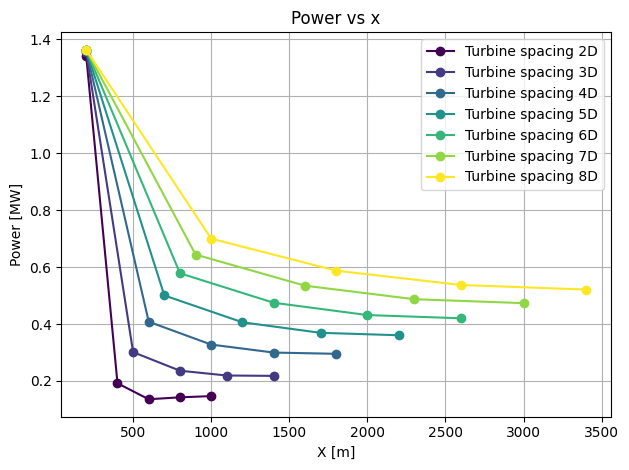

In [4]:
# Comparison of power production from each turbine for 2D, 3D, 4D, 5D, 6D, 7D, 8D

colors = plt.cm.viridis(np.linspace(0, 1, len(XT)))  # Use a colormap for distinct colors

# Loop over each row and plot the corresponding values
for i in range(len(XT)):
    plt.plot(XT[i], PowerTurbines[i], color=colors[i], marker='o', label=f'Turbine spacing {i+2}D')
plt.xlabel('X [m]')
plt.ylabel('Power [MW]')
plt.title('Power vs x')
# Add legend to distinguish the lines
plt.legend()

# Final touches
plt.tight_layout()
plt.grid(True)
plt.show()

In [5]:
Farm_Power = []
for i in range (len(PowerTurbines)):
    Farm_Power.append(np.sum(PowerTurbines[i]))

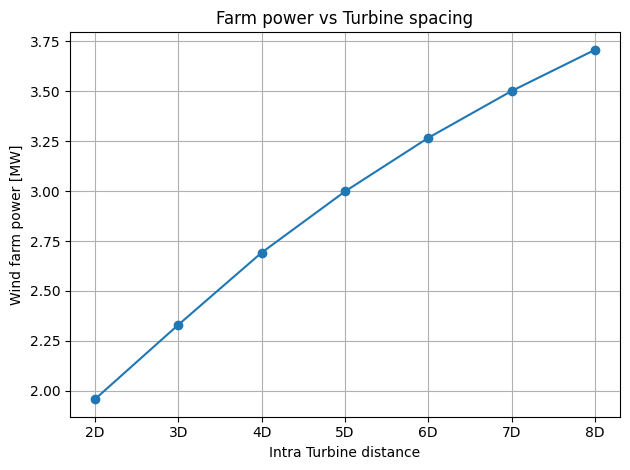

In [6]:
# Plot wind power generation from whole wind farm
plt.plot( ['2D','3D','4D','5D','6D', '7D', '8D'], Farm_Power, marker = 'o')
plt.xlabel('Intra Turbine distance')
plt.ylabel('Wind farm power [MW]')
plt.title('Farm power vs Turbine spacing')
# plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [19]:
data_set['t']

array([[503.74368905]])

[[11.58154126]]
[[23.42527269]]
[[35.37924749]]
[[47.36291586]]
[[59.3606418]]
[[71.36478044]]
[[83.37209168]]
[[95.38102248]]
[[107.39079658]]
[[119.40101471]]
[[131.41146795]]
[[143.42204657]]
[[155.43269265]]
[[167.4433753]]
[[179.45407793]]
[[191.46479155]]
[[203.47551125]]
[[215.48623435]]
[[227.49695935]]
[[239.50768543]]
[[251.51841213]]
[[263.52913917]]
[[275.53986642]]
[[287.55059378]]
[[299.56132121]]
[[311.57204868]]
[[323.58277618]]
[[335.59350368]]
[[347.6042312]]
[[359.61495872]]
[[371.62568625]]
[[383.63641377]]
[[395.6471413]]


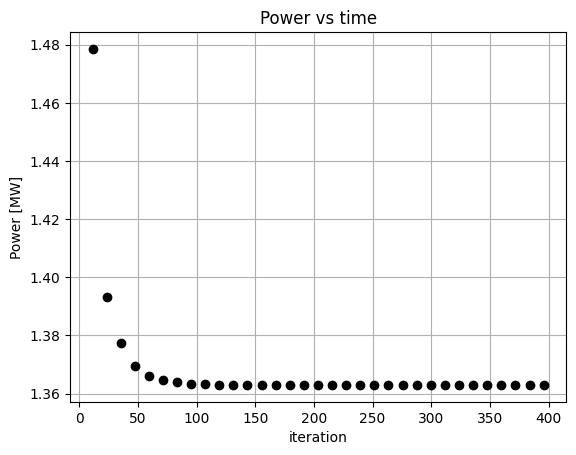

In [21]:
# convergence analysis
tt=np.arange(1,34)*100 # Replace 34 with position of turbine for analysis case
# tt=[200,400,600,800,1000,1200]
turbine=0
for t in tt:
    a=loadmat(path+'sim_res_8D/'+'simulation'+'_'+str(t)+'.mat')
    U=(a['u'][31,31,:]+a['u'][32,32,:]+a['u'][31,31,:]+a['u'][32,32,:])/4
    UTurbines=np.interp(XT[6][turbine],X,U)
    PowerTurbines=0.5*1.225*np.pi*50**2*UTurbines**3/(1-a_AD)**2*CT/1e6
    print(a['t'])
    plt.plot(a['t'],PowerTurbines,'ok')
plt.xlabel('iteration')
plt.ylabel('Power [MW]')
plt.title('Power vs time')
plt.grid()
plt.show()